<a href="https://colab.research.google.com/github/Riya-tech/ML-DL-programs/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [1]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [5]:
x = dataset.data

In [9]:
y = dataset.target

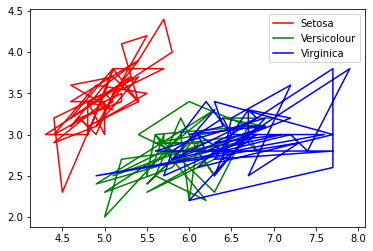

In [12]:
plt.plot(x[:,0][y==0], x[:, 1][y==0],'r',label='Setosa')
plt.plot(x[:,0][y==1], x[:, 1][y==1],'g', label= 'Versicolour')
plt.plot(x[:,0][y==2], x[:, 1][y==2],'b', label= 'Virginica')
plt.legend()
plt.show()

In [14]:
#standardising data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [17]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()

In [26]:
log_reg.fit( x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
log_reg.score(x_test,y_test)

1.0

In [ ]:
#Another Way
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# read the dataset
data = pd.read_csv('Iris.csv')
print(data.head())

print('\n\nColumn Names\n\n')
print(data.columns)

#label encode the target variable
encode = LabelEncoder()
data.Species = encode.fit_transform(data.Species)

print(data.head())

# train-test-split   
train , test = train_test_split(data,test_size=0.2,random_state=0)

print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)

# seperate the target and independent variable
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

# create the object of the model
model = LogisticRegression()

model.fit(train_x,train_y)

predict = model.predict(test_x)

print('Predicted Values on Test Data',encode.inverse_transform(predict))

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y,predict))